#### Exemplar-based Clustering

In [1]:
import numpy as np

In [2]:
class exemplar_based_clustering:
    def __init__(X, k, dist, t_max):
        X.k = k
        X.dist = dist
        X.t_max = t_max
    
    def dist(a, b, ax=1):
        return np.linalg.norm(a - b, axis=ax)
    
    def fit(X,data):
        X.centroids = {}
        for i in range(X.k):
            X.centroids[i] = data[i]
        for i in range(X.t_max):
            X.clusterings = {}
            for i in range(X.k):
                X.clusterings[i] = []
            for featureset in data:
                distances = [np.linalg.norm(featureset-X.centroids[centroid]) for centroid in X.centroids]
                clustering = distances.index(min(distances))
                X.clusterings[clustering].append(featureset)
            prev_centroids = dict(X.centroids)
            for clustering in X.clusterings:
                X.centroids[clustering] = np.average(X.clusterings[clustering],axis=0)

            optimized = True
            for c in X.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = X.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > X.t_max:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
            if optimized:
                break

    def pick_medoid(X,data):
        euclidean_distance = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        clustering = euclidean_distance.index(min(euclidean_distance))
        return clustering

In [ ]:
import sklearn.datasets as sd
blobs = sd.make_blobs(1000, 2, 3, random_state=42)[0]
moons = sd.make_moons(1000, noise=.05, random_state=42)[0]

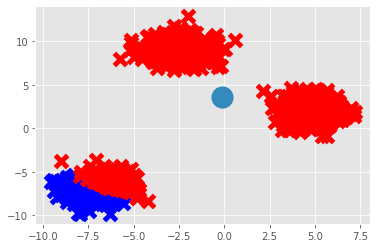

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
colors = ["b","r","g"]

data = exemplar_based_clustering(2,0.01,300)
data.fit(blobs)

for centroid in data.centroids:
    plt.scatter(data.centroids[centroid][0], data.centroids[centroid][1],
                marker="o",s=200, linewidths=8)

for clustering in data.clusterings:
    color = colors[clustering]
    for featureset in data.clusterings[clustering]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

592.3215070743328


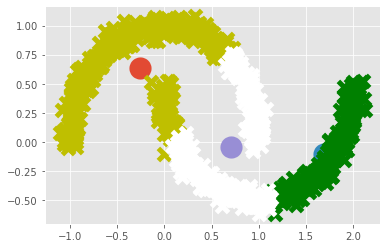

In [5]:
colors = ["y","g","w"]

data = exemplar_based_clustering(3,0.02,100)
data.fit(moons)

for centroid in data.centroids:
    plt.scatter(data.centroids[centroid][0], data.centroids[centroid][1],
                marker="o",s=200, linewidths=8)

for clustering in data.clusterings:
    color = colors[clustering]
    for featureset in data.clusterings[clustering]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()